In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math 

In [89]:
df = pd.read_csv("Alquileres_text.csv")
df = df.drop("link", axis=1)
df.head(3)

,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,colegios,...,estrato,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,text
0,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,20,...,Bajo,0.0,3,3.0,1,0,1,0,0,alquiler apartamentos zona 1 apartamento cerca...
1,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,20,...,Bajo,0.0,1,3.0,1,0,1,0,0,citymax advance ofrece lindo apartamento renta...
2,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,20,...,Bajo,0.5,1,1.0,1,0,1,4,0,página encontrada mapainmueble inicioalquilera...


In [90]:
for col in df:
    tipo = df[col].dtype
    if(tipo == "object"):
        print(f'{col}: {tipo}')

tipo_vivienda: object
estado: object
estrato: object
text: object


In [91]:
df['estrato'] = df['estrato'].apply(lambda x: 0 if x == 'Bajo' else (1 if x == 'Medio' else 2))
df['estado'] = df['estado'].apply(lambda x: 0 if x == 'Viejo' else 1)
df.info()

df['tipo_vivienda']= df['tipo_vivienda'].apply(str.capitalize)
df['tipo_vivienda'].unique()

df_onehot = pd.get_dummies(df, columns=['tipo_vivienda'], drop_first=False)
bool_cols = ['tipo_vivienda_Apartamento', 'tipo_vivienda_Casa']
df_onehot[bool_cols] = df_onehot[bool_cols].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tamaño              156 non-null    float64
 1   cuartos             156 non-null    int64  
 2   baños               156 non-null    float64
 3   sala                156 non-null    float64
 4   comedor             156 non-null    float64
 5   cocina              156 non-null    float64
 6   lavanderia          156 non-null    float64
 7   parqueos            156 non-null    float64
 8   zona                156 non-null    int64  
 9   colegios            156 non-null    int64  
 10  hospitales          156 non-null    int64  
 11  precio_renta        156 non-null    float64
 12  tipo_vivienda       156 non-null    object 
 13  estado              156 non-null    int64  
 14  estrato             156 non-null    int64  
 15  amueblado           156 non-null    float64
 16  cantidad

In [92]:
columnas = ["text"] + [col for col in df_onehot.columns if col != "text"]
df_onehot = df_onehot[columnas]
df_onehot

,text,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,...,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,tipo_vivienda_Apartamento,tipo_vivienda_Casa
0,alquiler apartamentos zona 1 apartamento cerca...,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,...,0.00,3,3.0,1,0,1,0,0,1,0
1,citymax advance ofrece lindo apartamento renta...,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,...,0.00,1,3.0,1,0,1,0,0,1,0
2,página encontrada mapainmueble inicioalquilera...,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,...,0.50,1,1.0,1,0,1,4,0,1,0
3,apartamento amueblado zona 1 mapainmueble inic...,56.0,1,1.0,0.00,0.33,0.33,0.0,0.0,1,...,0.00,1,1.0,1,0,1,0,1,1,0
4,mapainmueblecom encuentra aquí casas apartamen...,20.0,1,1.0,0.00,0.33,0.33,0.0,1.0,1,...,1.00,1,0.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,apartamento renta edificio orleans zona 15 gua...,130.0,1,2.0,0.33,0.33,1.00,1.0,2.0,15,...,0.33,1,9.0,0,1,0,1,0,1,0
152,apartamento renta zona 16 frente embajada amer...,275.0,3,3.0,0.33,0.33,1.00,1.0,2.0,16,...,0.33,2,2.0,1,1,0,5,0,1,0
153,apartamento amueblado renta zona 16 hexa cañad...,50.0,3,1.0,0.33,0.33,0.33,1.0,2.0,16,...,1.00,1,3.0,1,1,0,0,0,1,0
154,alquilo apartamento condominio zona 16 apartam...,120.0,3,2.0,0.33,0.33,1.00,1.0,2.0,16,...,0.33,1,1.0,1,1,0,8,0,1,0


In [93]:
for col in df_onehot:
    porcentaje = df_onehot[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

text: 0.00641025641025641


In [94]:

        
df_onehot = df_onehot.dropna()

for col in df_onehot:
    porcentaje = df_onehot[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Ajusta el número de características
X = vectorizer.fit_transform(df_onehot['text']).toarray()

# Verificar dimensiones
print(X.shape)


(155, 1000)


In [97]:

Y = df_onehot[df_onehot.columns[1:]]
Y

,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,colegios,...,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,tipo_vivienda_Apartamento,tipo_vivienda_Casa
0,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,20,...,0.00,3,3.0,1,0,1,0,0,1,0
1,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,20,...,0.00,1,3.0,1,0,1,0,0,1,0
2,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,20,...,0.50,1,1.0,1,0,1,4,0,1,0
3,56.0,1,1.0,0.00,0.33,0.33,0.0,0.0,1,20,...,0.00,1,1.0,1,0,1,0,1,1,0
4,20.0,1,1.0,0.00,0.33,0.33,0.0,1.0,1,20,...,1.00,1,0.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,130.0,1,2.0,0.33,0.33,1.00,1.0,2.0,15,34,...,0.33,1,9.0,0,1,0,1,0,1,0
152,275.0,3,3.0,0.33,0.33,1.00,1.0,2.0,16,32,...,0.33,2,2.0,1,1,0,5,0,1,0
153,50.0,3,1.0,0.33,0.33,0.33,1.0,2.0,16,32,...,1.00,1,3.0,1,1,0,0,0,1,0
154,120.0,3,2.0,0.33,0.33,1.00,1.0,2.0,16,32,...,0.33,1,1.0,1,1,0,8,0,1,0


In [98]:
print(Y.columns)

Index(['tamaño', 'cuartos', 'baños', 'sala', 'comedor', 'cocina', 'lavanderia',
       'parqueos', 'zona', 'colegios', 'hospitales', 'precio_renta', 'estado',
       'estrato', 'amueblado', 'cantidad_piso', 'num_piso', 'zona_comercial',
       'zona_vivienda', 'transporte_publico', 'punt_amenidades', 'vistas',
       'tipo_vivienda_Apartamento', 'tipo_vivienda_Casa'],
      dtype='object')


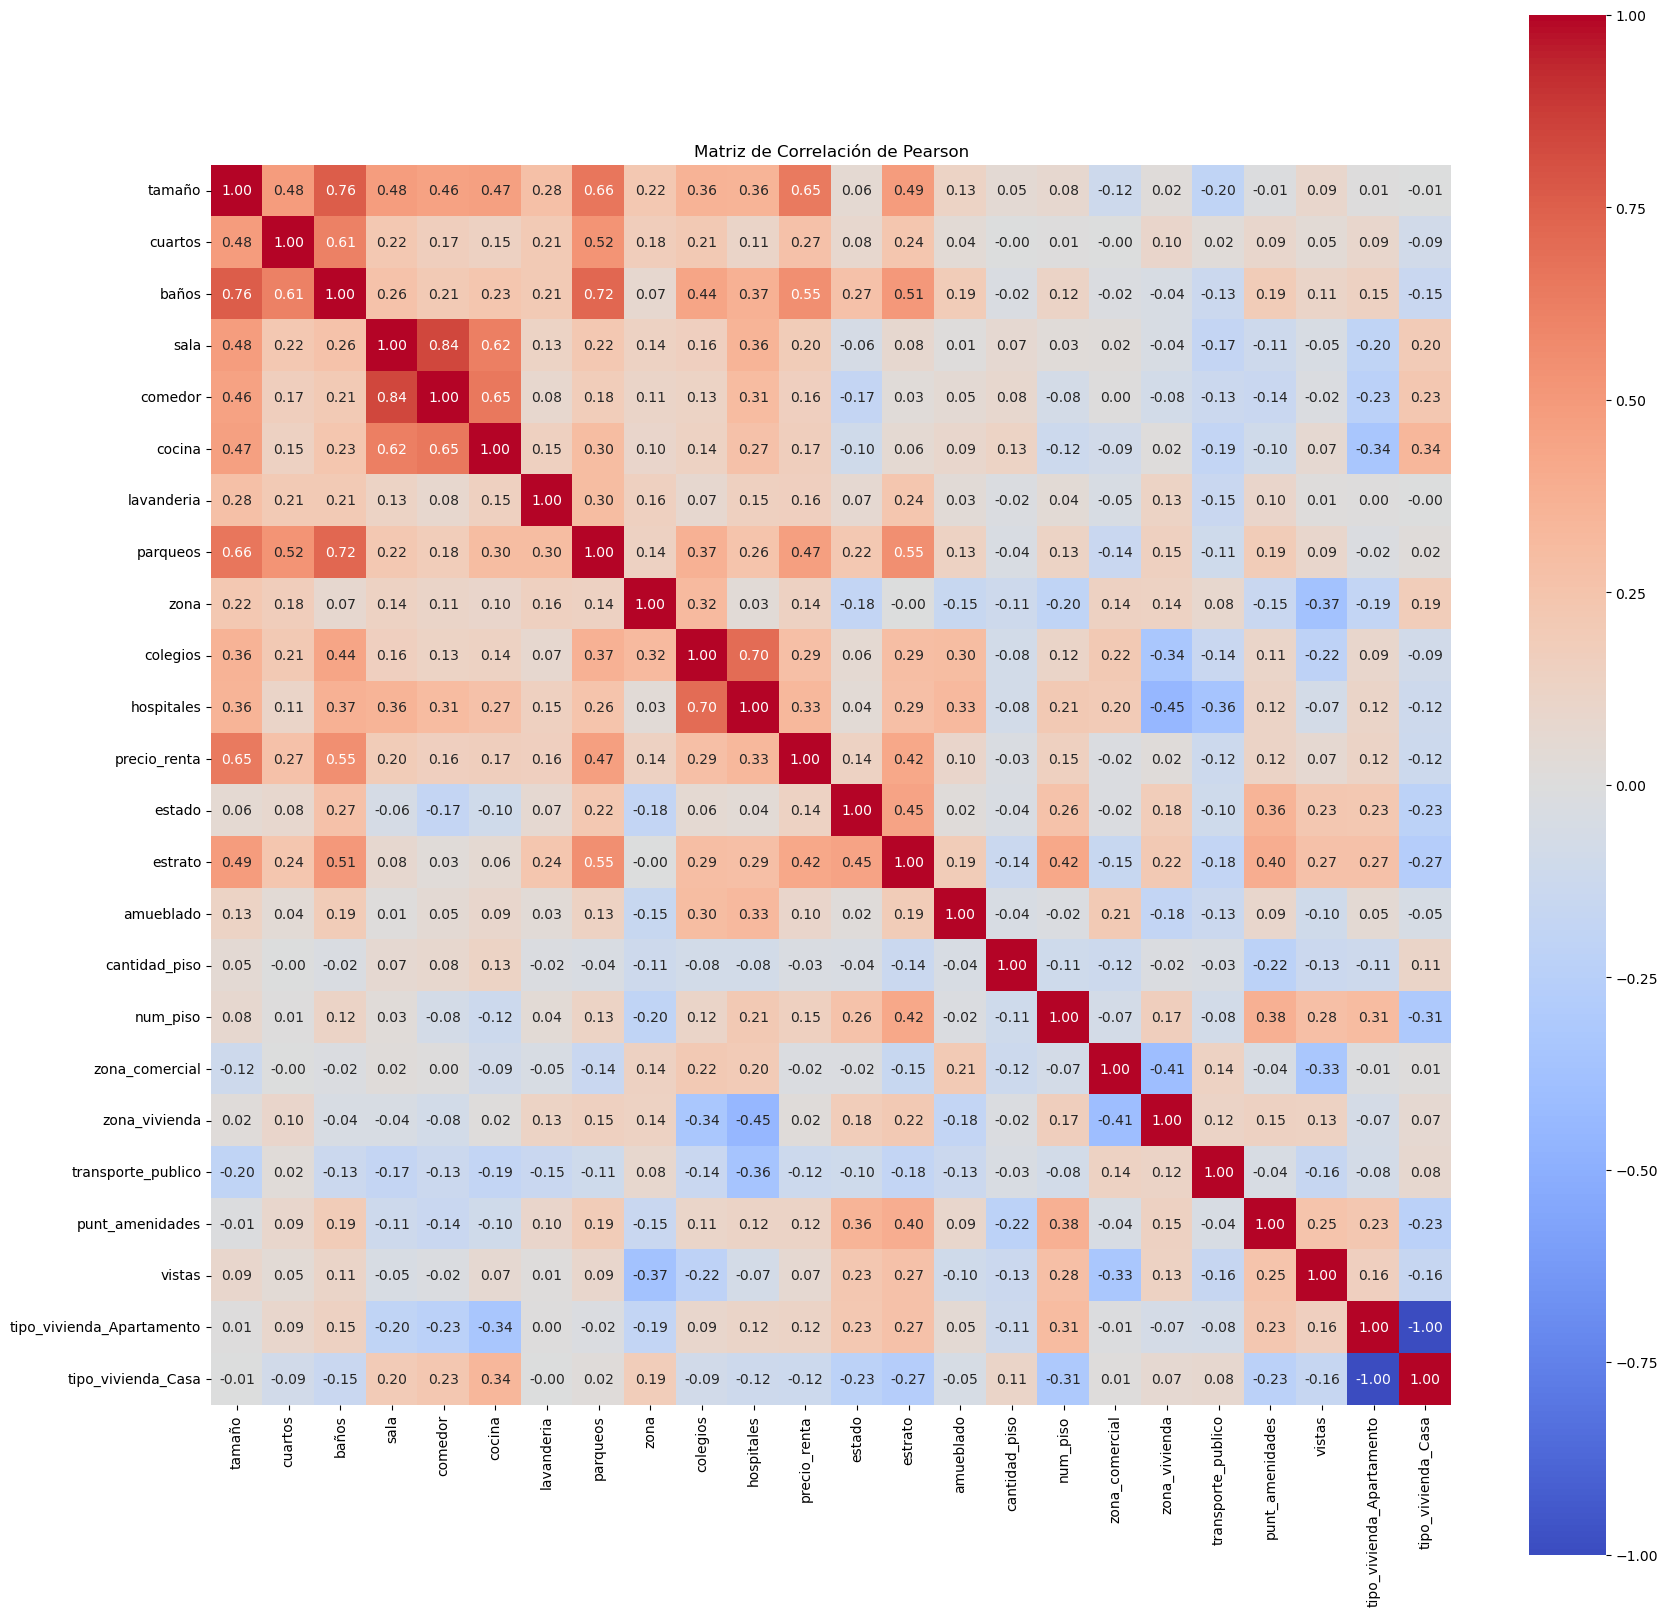

In [100]:
correlation_matrix = df_onehot.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de Pearson")
plt.show()

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# Dividir datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modelo multisalida
rf = RandomForestRegressor()
model = MultiOutputRegressor(rf)
model.fit(X_train, Y_train)


MultiOutputRegressor(estimator=RandomForestRegressor())

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones
Y_pred = model.predict(X_test)

# Evaluar cada salida
i = 0
for col in Y.columns:
    rmse = np.sqrt(mean_squared_error(Y_test[col], Y_pred[:, i]))
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    print(f"{col}\t: RMSE={rmse}, MAE={mae}")
    i = i + 1

tamaño	: RMSE=36.349867675611364, MAE=24.91645962621608
cuartos	: RMSE=0.6187425085552859, MAE=0.3292931853093143
baños	: RMSE=0.38653948481977235, MAE=0.259837902241128
sala	: RMSE=0.29939893573459764, MAE=0.2265704064752449
comedor	: RMSE=0.2782760708129549, MAE=0.19187784946236505
cocina	: RMSE=0.2994745221763089, MAE=0.23601352150537616
lavanderia	: RMSE=0.4535616859947715, MAE=0.39265624955689477
parqueos	: RMSE=0.6235506440238305, MAE=0.4596071428571429
zona	: RMSE=6.4497480890483985, MAE=4.439039234511008
colegios	: RMSE=7.311489237175234, MAE=6.1776044546851
hospitales	: RMSE=18.33015496668026, MAE=13.328275694735371
precio_renta	: RMSE=4330.245501799593, MAE=2586.8973579574545
estado	: RMSE=0.5111975783382844, MAE=0.4307351716383975
estrato	: RMSE=0.577341976989098, MAE=0.43674193548387097
amueblado	: RMSE=0.25042360500610794, MAE=0.16821516850532975
cantidad_piso	: RMSE=0.568274127398888, MAE=0.1670967741935484
num_piso	: RMSE=4.591882509626758, MAE=3.238790258576549
zona_com

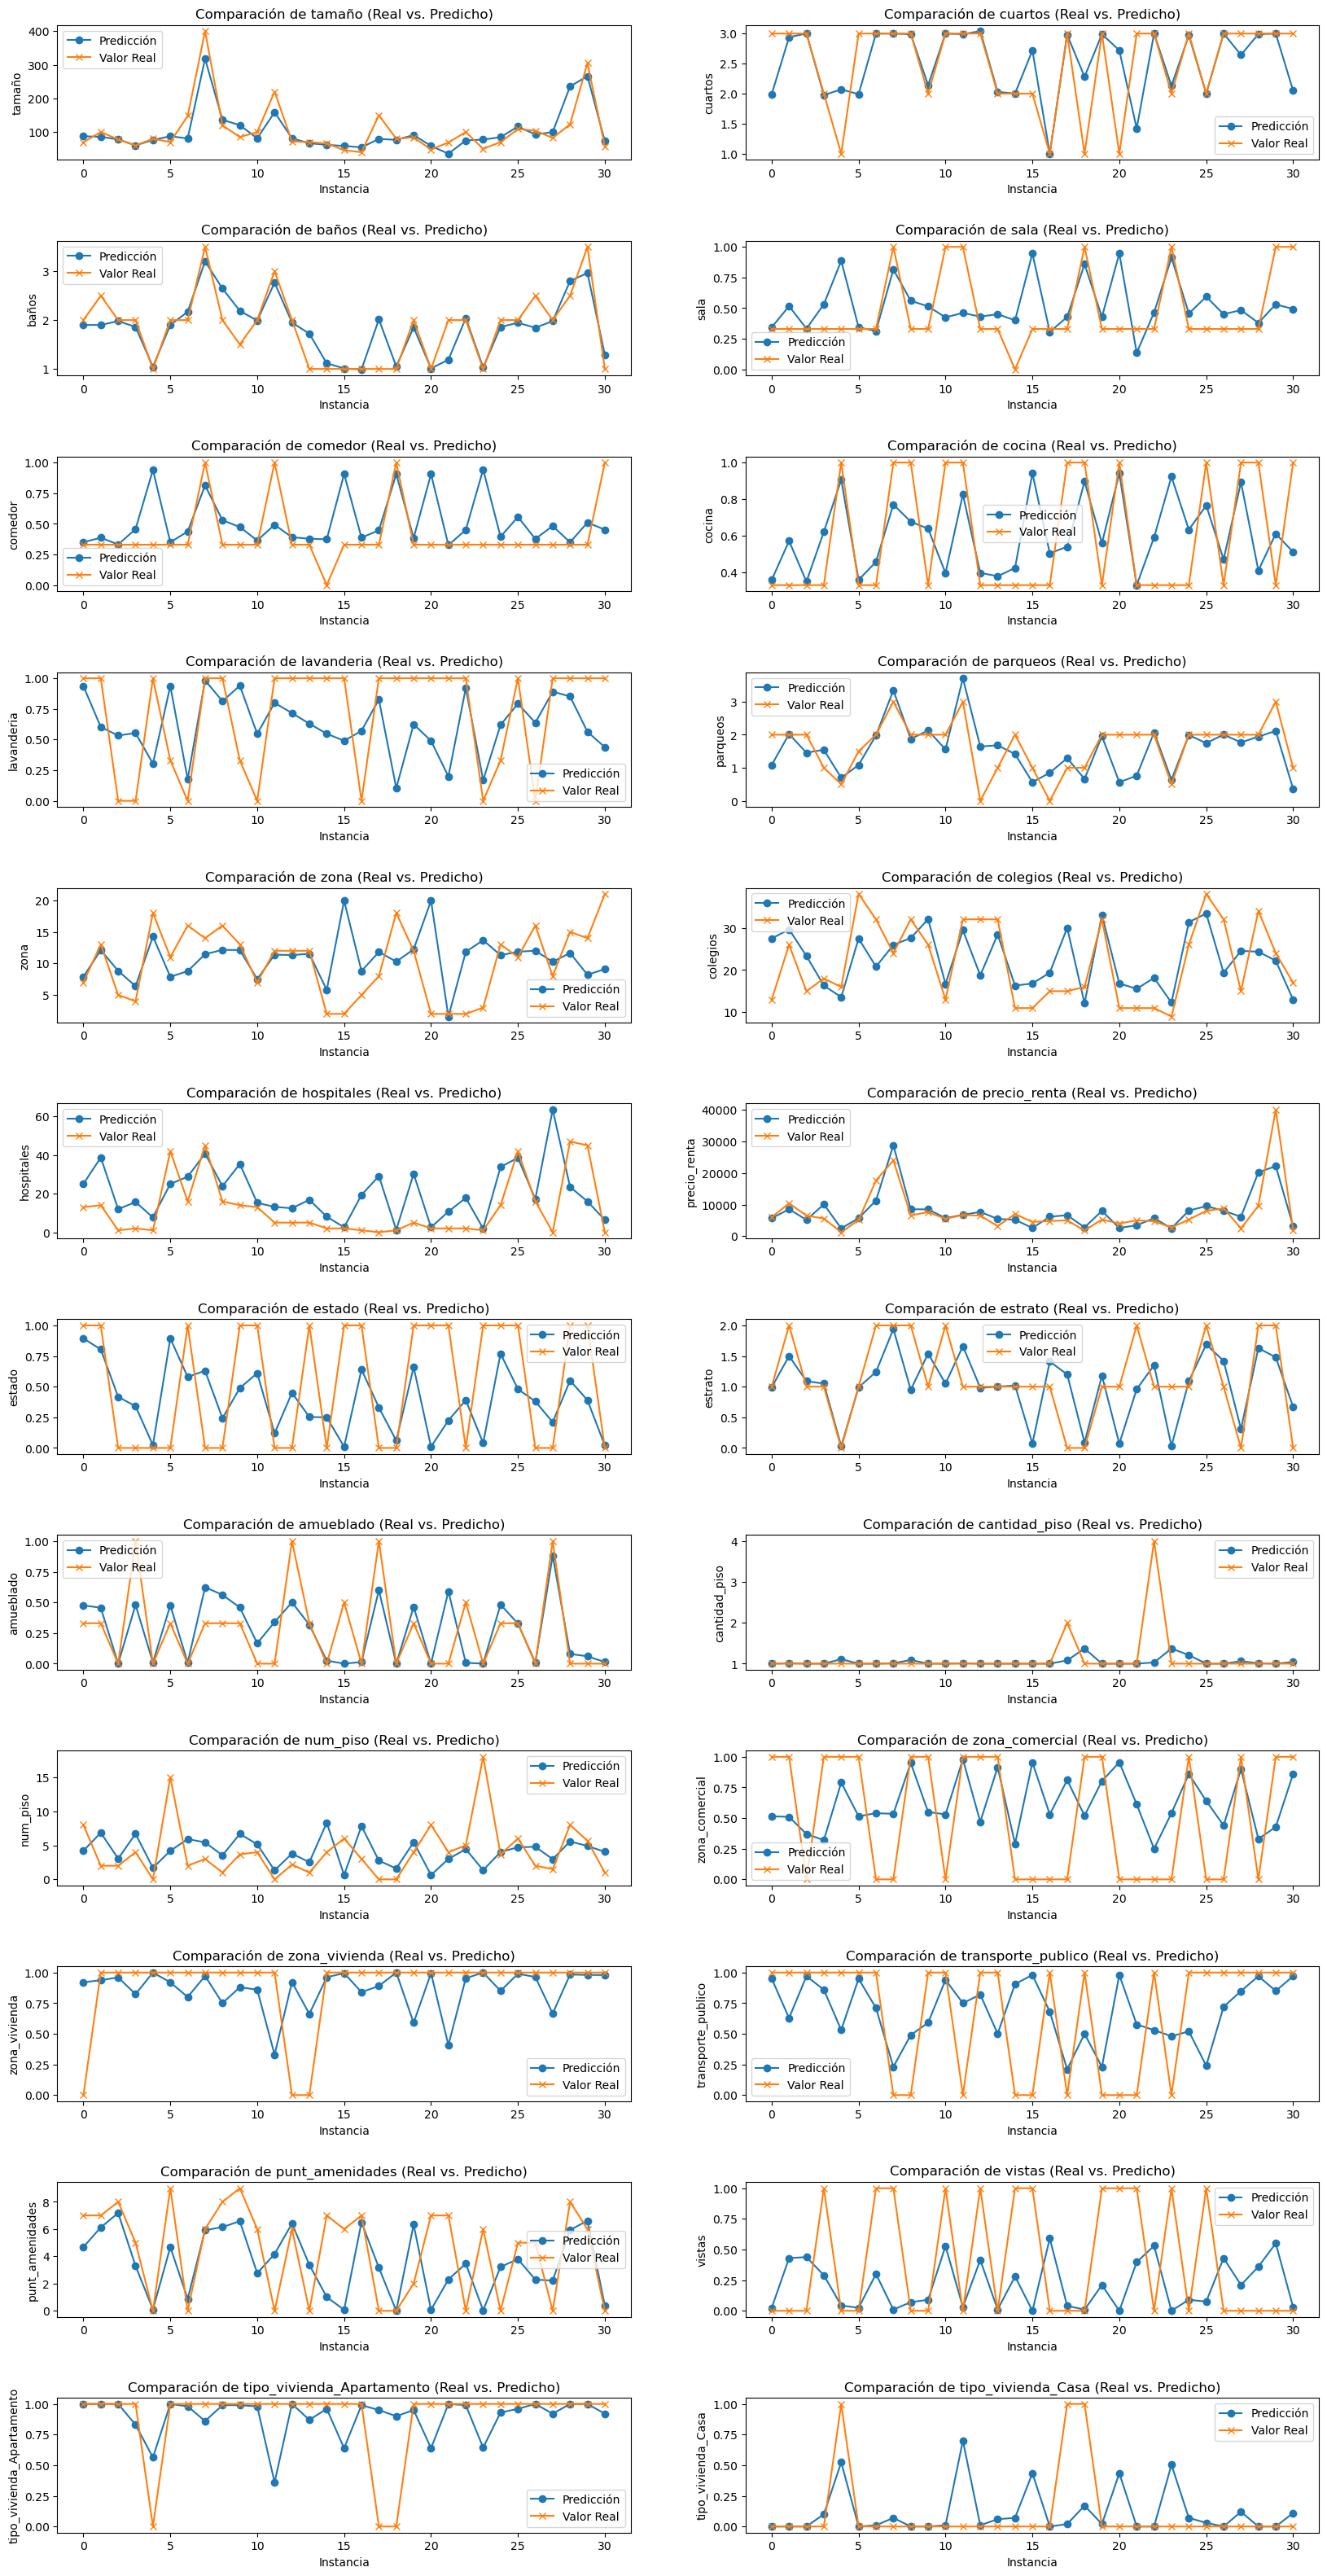

In [104]:
def plot(Y_test, Y_pred):
    test =  Y_test.reset_index(drop=True)
    test.shape

    n = 2
    rows = int(np.ceil(test.shape[1] / n))  # Calcular filas dinámicamente
    fig, axs = plt.subplots(rows, n, figsize=(20, 40))
    axs = axs.flatten()  # Aplanar axs para un acceso simple

    for i, col in enumerate(Y_test.columns):
        # Graficar valores reales y predicciones
        axs[i].plot(Y_pred[:, i], label='Predicción', marker='o')
        axs[i].plot(test[col], label='Valor Real', marker='x')

        # Configurar título, etiquetas y leyenda
        axs[i].set_title(f'Comparación de {col} (Real vs. Predicho)')
        axs[i].set_xlabel('Instancia')
        axs[i].set_ylabel(f'{col}')
        axs[i].legend()

    # Ocultar subplots vacíos si sobran
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    plt.show()
    
plot(Y_test, Y_pred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Dimensión de entrada (e.g., representación TF-IDF o embeddings)
input_dim = 500

# Capa de entrada
inputs = Input(shape=(input_dim,))

# Capa oculta compartida
shared = Dense(128, activation="relu")(inputs)

# Salidas categóricas
cat_output_1 = Dense(3, activation="softmax", name="cat_output_1")(shared)  # Ejemplo: 3 clases
cat_output_2 = Dense(4, activation="softmax", name="cat_output_2")(shared)  # Ejemplo: 4 clases
cat_output_3 = Dense(2, activation="softmax", name="cat_output_3")(shared)  # Ejemplo: 2 clases

# Salidas continuas
cont_output_1 = Dense(1, activation="linear", name="cont_output_1")(shared)
cont_output_2 = Dense(1, activation="linear", name="cont_output_2")(shared)

# Definir el modelo
model = Model(inputs=inputs, outputs=[cat_output_1, cat_output_2, cat_output_3, cont_output_1, cont_output_2])

# Compilar el modelo
model.compile(
    optimizer="adam",
    loss={
        "cat_output_1": "sparse_categorical_crossentropy",
        "cat_output_2": "sparse_categorical_crossentropy",
        "cat_output_3": "sparse_categorical_crossentropy",
        "cont_output_1": "mse",
        "cont_output_2": "mse",
    },
    loss_weights={
        "cat_output_1": 1.0,
        "cat_output_2": 1.0,
        "cat_output_3": 1.0,
        "cont_output_1": 0.5,
        "cont_output_2": 0.5,
    },
    metrics={
        "cat_output_1": "accuracy",
        "cat_output_2": "accuracy",
        "cat_output_3": "accuracy",
        "cont_output_1": "mae",
        "cont_output_2": "mae",
    }
)

model.summary()


In [ ]:
model.fit(
    X, Y,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
